In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#code reference from https://www.kaggle.com/code/siddheshera/pima-diabetes-with-eda-12-models-beginner
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#dataset obtained from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

dataset = pd.read_csv("/Users/suryahankar/Downloads/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


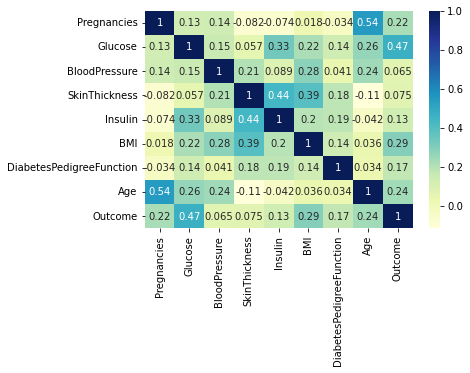

In [7]:
#plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot= True,)
plt.show()

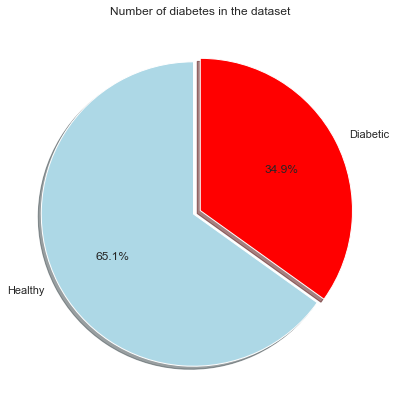

In [8]:
sns.set(style="whitegrid")
labels = ['Healthy', 'Diabetic']
sizes = dataset['Outcome'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of diabetes in the dataset')
plt.show()

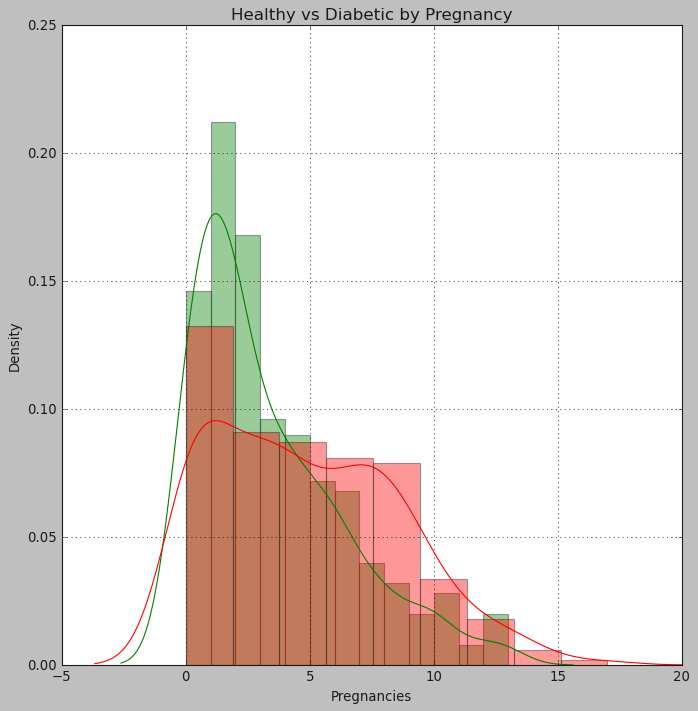

In [9]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Pregnancies"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Pregnancies"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Pregnancy', fontsize=15)
plt.xlim([-5,20])
plt.grid(linewidth = 0.7)
plt.show()

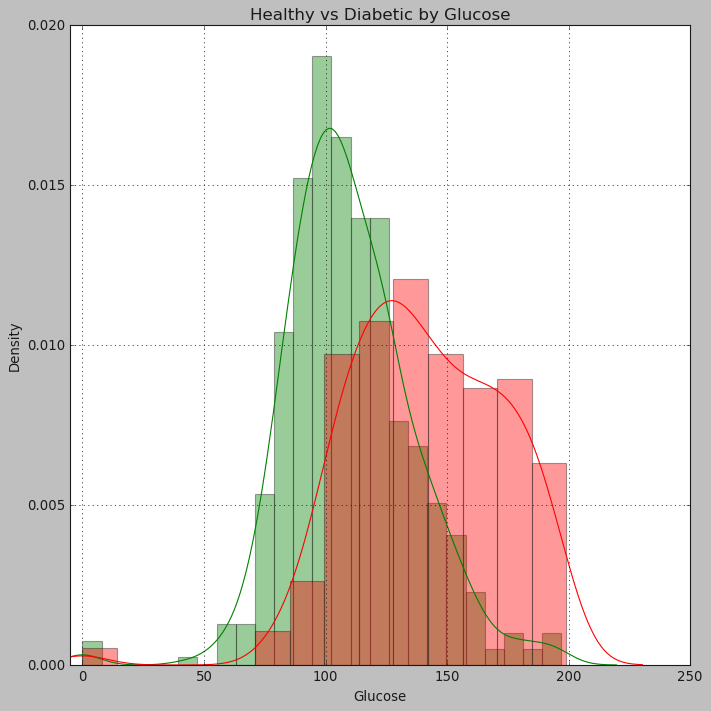

In [10]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Glucose"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Glucose"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Glucose', fontsize=15)
plt.xlim([-5,250])
plt.grid(linewidth = 0.7)
plt.show()

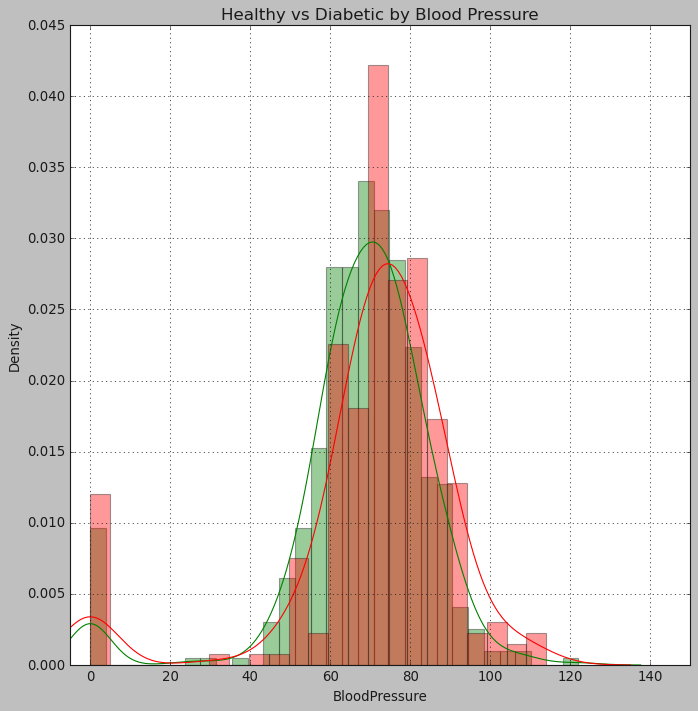

In [11]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["BloodPressure"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["BloodPressure"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.show()

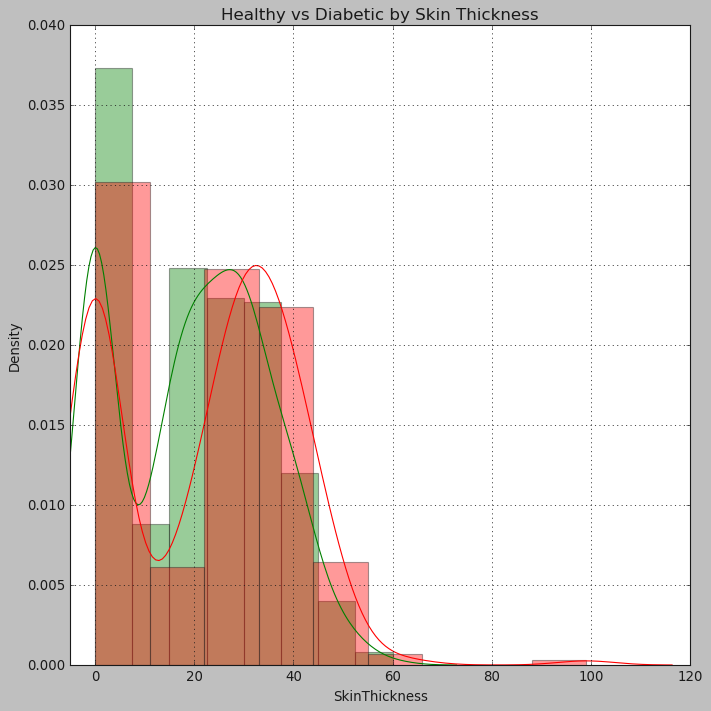

In [12]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["SkinThickness"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["SkinThickness"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Skin Thickness', fontsize=15)
plt.xlim([-5,120])
plt.grid(linewidth = 0.7)
plt.show()

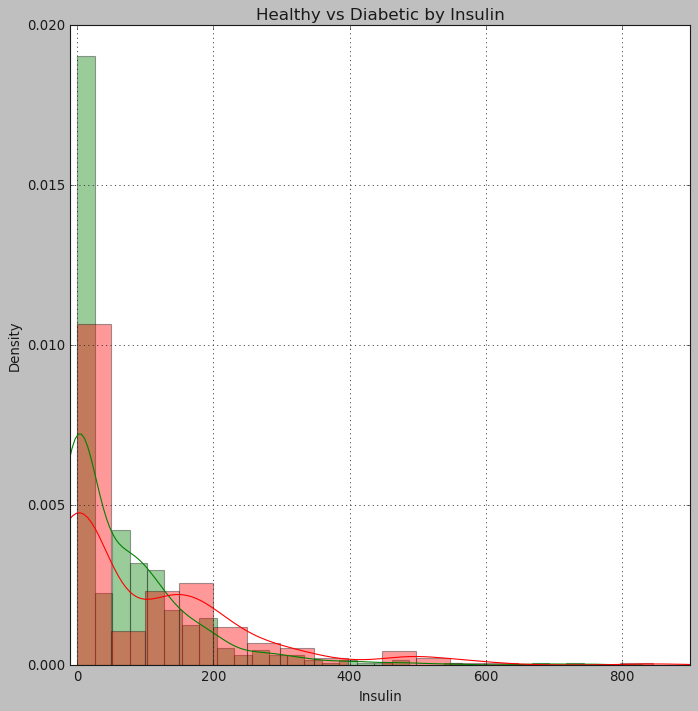

In [13]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Insulin"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Insulin"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Insulin', fontsize=15)
plt.xlim([-10,900])
plt.grid(linewidth = 0.7)
plt.show()

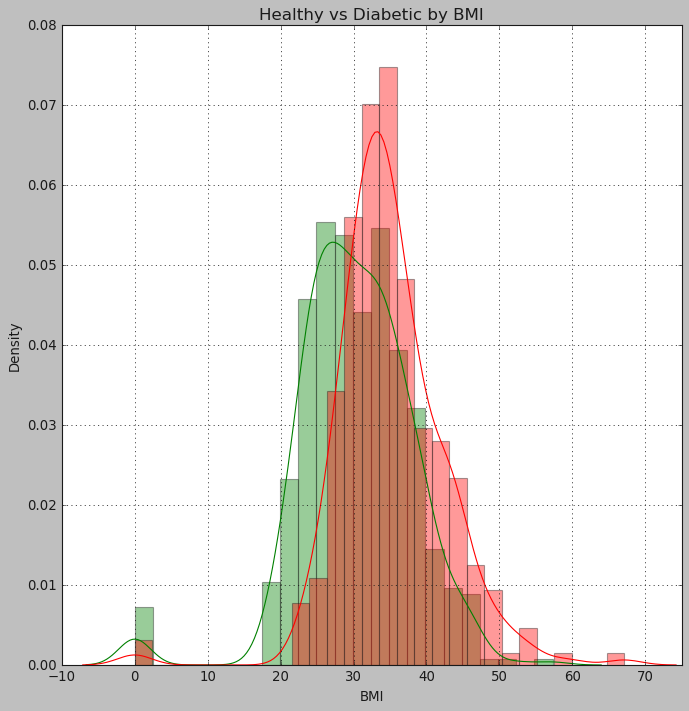

In [14]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["BMI"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["BMI"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by BMI', fontsize=15)
plt.xlim([-10,75])
plt.grid(linewidth = 0.7)
plt.show()

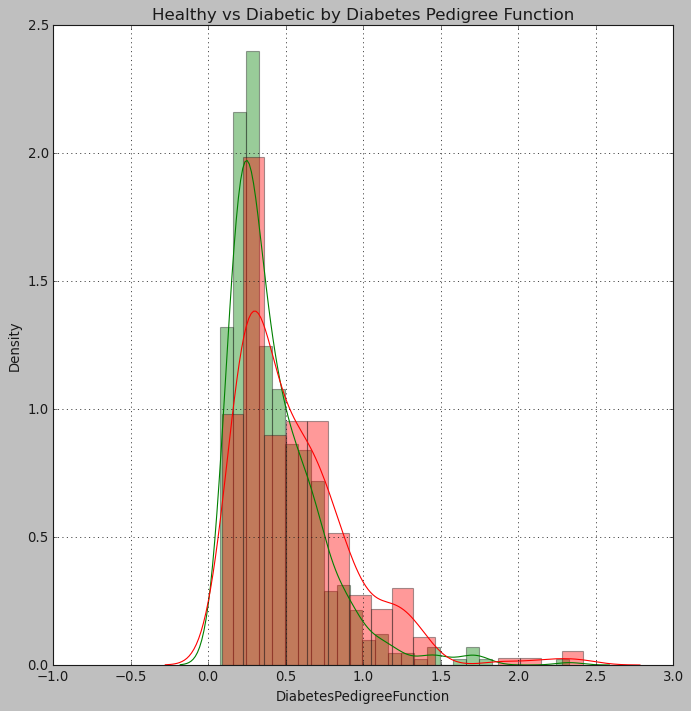

In [15]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["DiabetesPedigreeFunction"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["DiabetesPedigreeFunction"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=15)
plt.xlim([-1,3])
plt.grid(linewidth = 0.7)
plt.show()

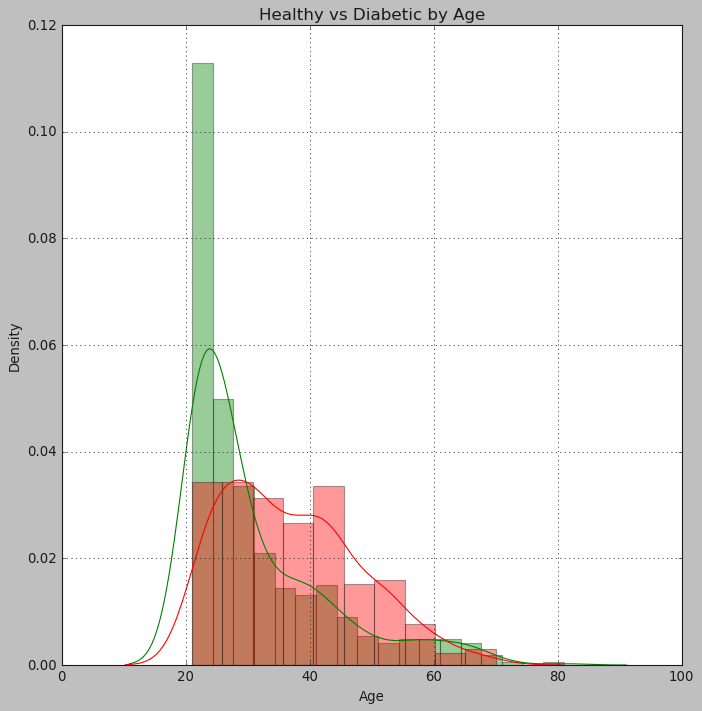

In [16]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Age"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Age"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Age', fontsize=15)
plt.xlim([0,100])
plt.grid(linewidth = 0.7)
plt.show()

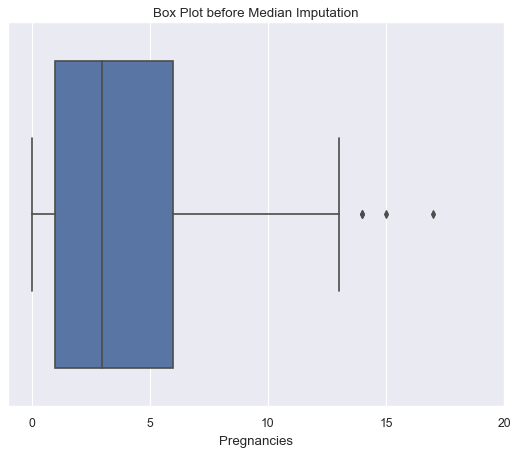

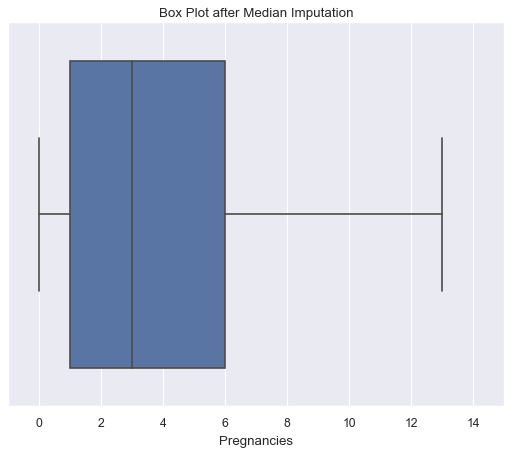

In [17]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Pregnancies)
plt.xlim([-1,20])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Pregnancies.quantile(0.25)
q3 = dataset.Pregnancies.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Pregnancies)
for i in dataset.Pregnancies:
    if i > Upper_tail or i < Lower_tail:
            dataset.Pregnancies = dataset.Pregnancies.replace(i, med)
sns.boxplot(x= dataset.Pregnancies)
plt.xlim([-1,15])
plt.title("Box Plot after Median Imputation")
plt.show()   

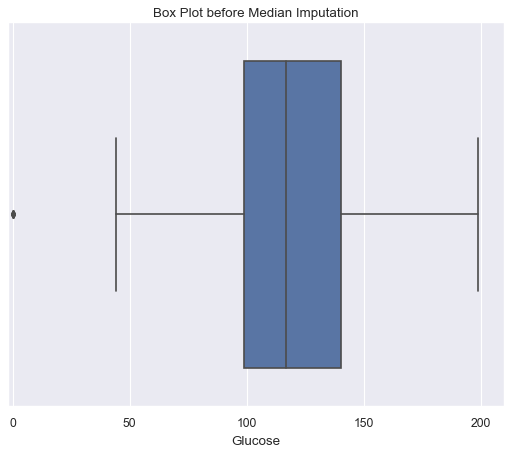

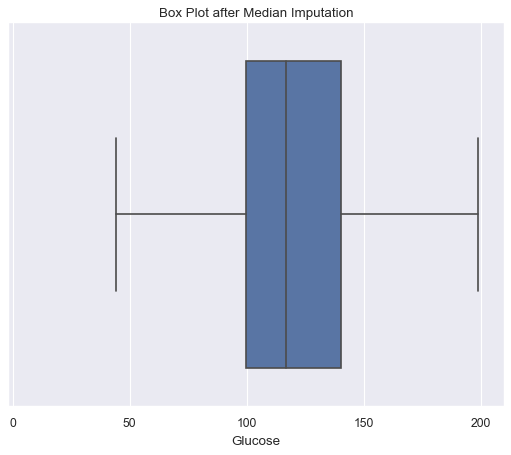

In [18]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Glucose.quantile(0.25)
q3 = dataset.Glucose.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Glucose)
for i in dataset.Glucose:
    if i > Upper_tail or i < Lower_tail:
            dataset.Glucose = dataset.Glucose.replace(i, med)
sns.boxplot(x= dataset.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot after Median Imputation")
plt.show()   

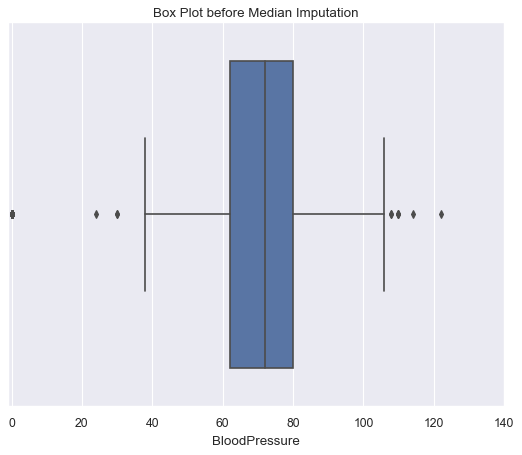

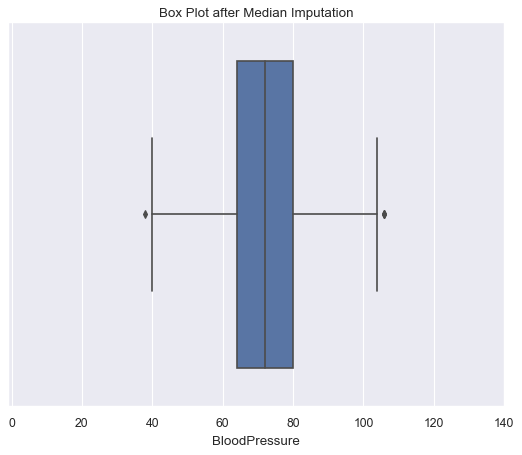

In [19]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.BloodPressure.quantile(0.25)
q3 = dataset.BloodPressure.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.BloodPressure)
for i in dataset.BloodPressure:
    if i > Upper_tail or i < Lower_tail:
            dataset.BloodPressure = dataset.BloodPressure.replace(i, med)
sns.boxplot(x= dataset.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot after Median Imputation")
plt.show()   


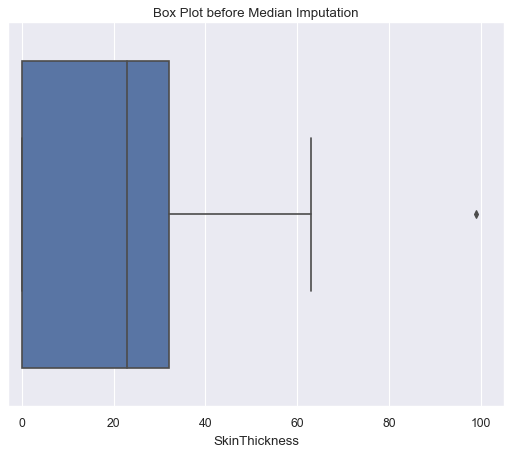

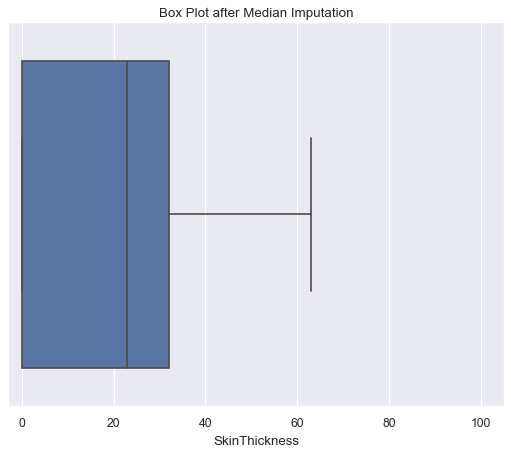

In [20]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.SkinThickness.quantile(0.25)
q3 = dataset.SkinThickness.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.SkinThickness)
for i in dataset.SkinThickness:
    if i > Upper_tail or i < Lower_tail:
            dataset.SkinThickness = dataset.SkinThickness.replace(i, med)
sns.boxplot(x= dataset.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot after Median Imputation")
plt.show()   

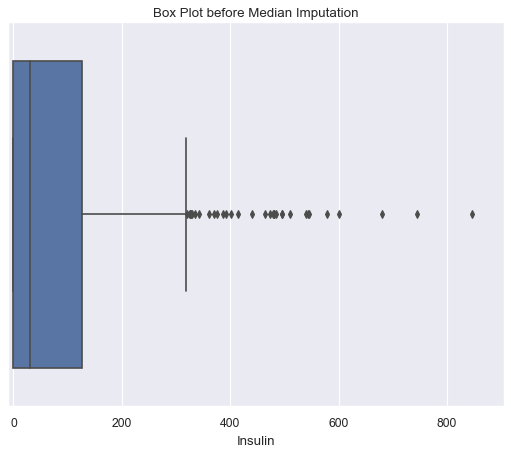

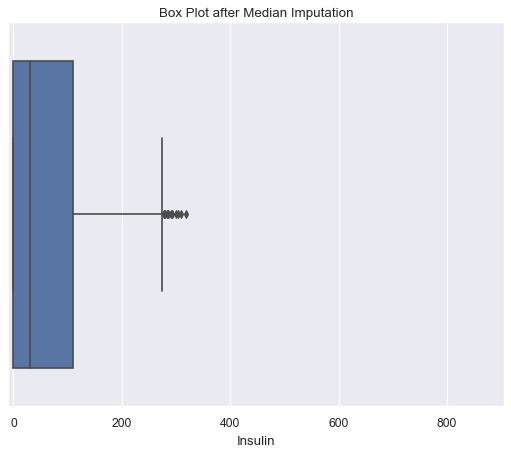

In [21]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Insulin.quantile(0.25)
q3 = dataset.Insulin.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Insulin)
for i in dataset.Insulin:
    if i > Upper_tail or i < Lower_tail:
            dataset.Insulin = dataset.Insulin.replace(i, med)
sns.boxplot(x= dataset.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot after Median Imputation")
plt.show()   

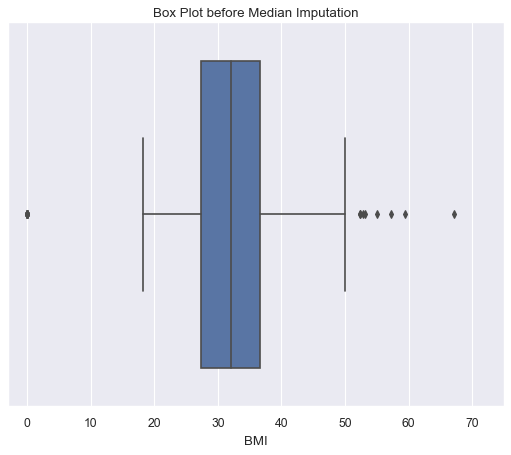

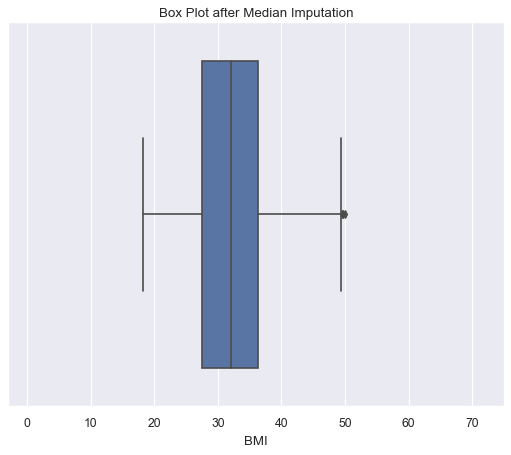

In [22]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.BMI)
plt.xlim([-3,75])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.BMI.quantile(0.25)
q3 = dataset.BMI.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.BMI)
for i in dataset.BMI:
    if i > Upper_tail or i < Lower_tail:
            dataset.BMI = dataset.BMI.replace(i, med)
sns.boxplot(x= dataset.BMI)
plt.xlim([-3,75])
plt.title("Box Plot after Median Imputation")
plt.show()   

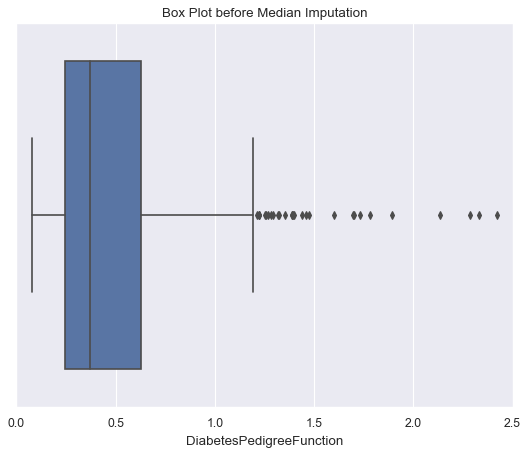

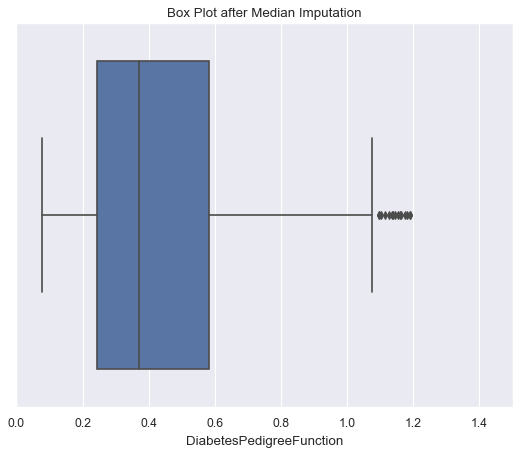

In [23]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.DiabetesPedigreeFunction)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.DiabetesPedigreeFunction.quantile(0.25)
q3 = dataset.DiabetesPedigreeFunction.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.DiabetesPedigreeFunction)
for i in dataset.DiabetesPedigreeFunction:
    if i > Upper_tail or i < Lower_tail:
            dataset.DiabetesPedigreeFunction = dataset.DiabetesPedigreeFunction.replace(i, med)
sns.boxplot(x= dataset.DiabetesPedigreeFunction)
plt.xlim([0,1.5])
plt.title("Box Plot after Median Imputation")
plt.show()   

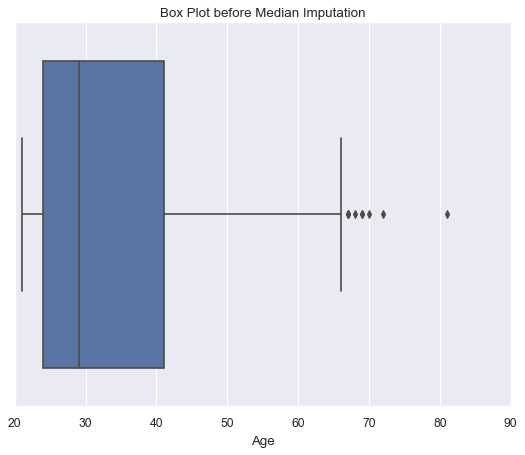

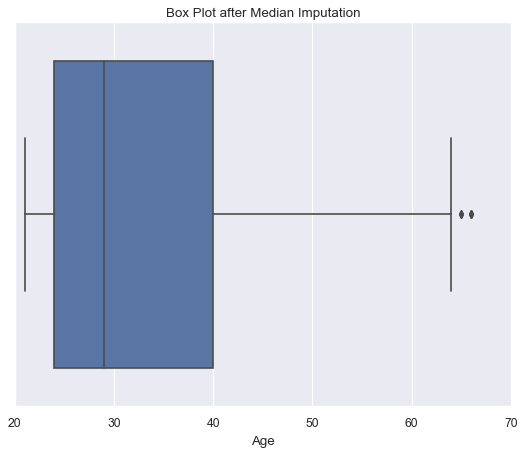

In [24]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Age)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Age.quantile(0.25)
q3 = dataset.Age.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Age)
for i in dataset.Age:
    if i > Upper_tail or i < Lower_tail:
            dataset.Age = dataset.Age.replace(i, med)
sns.boxplot(x= dataset.Age)
plt.title("Box Plot after Median Imputation")
plt.show()   

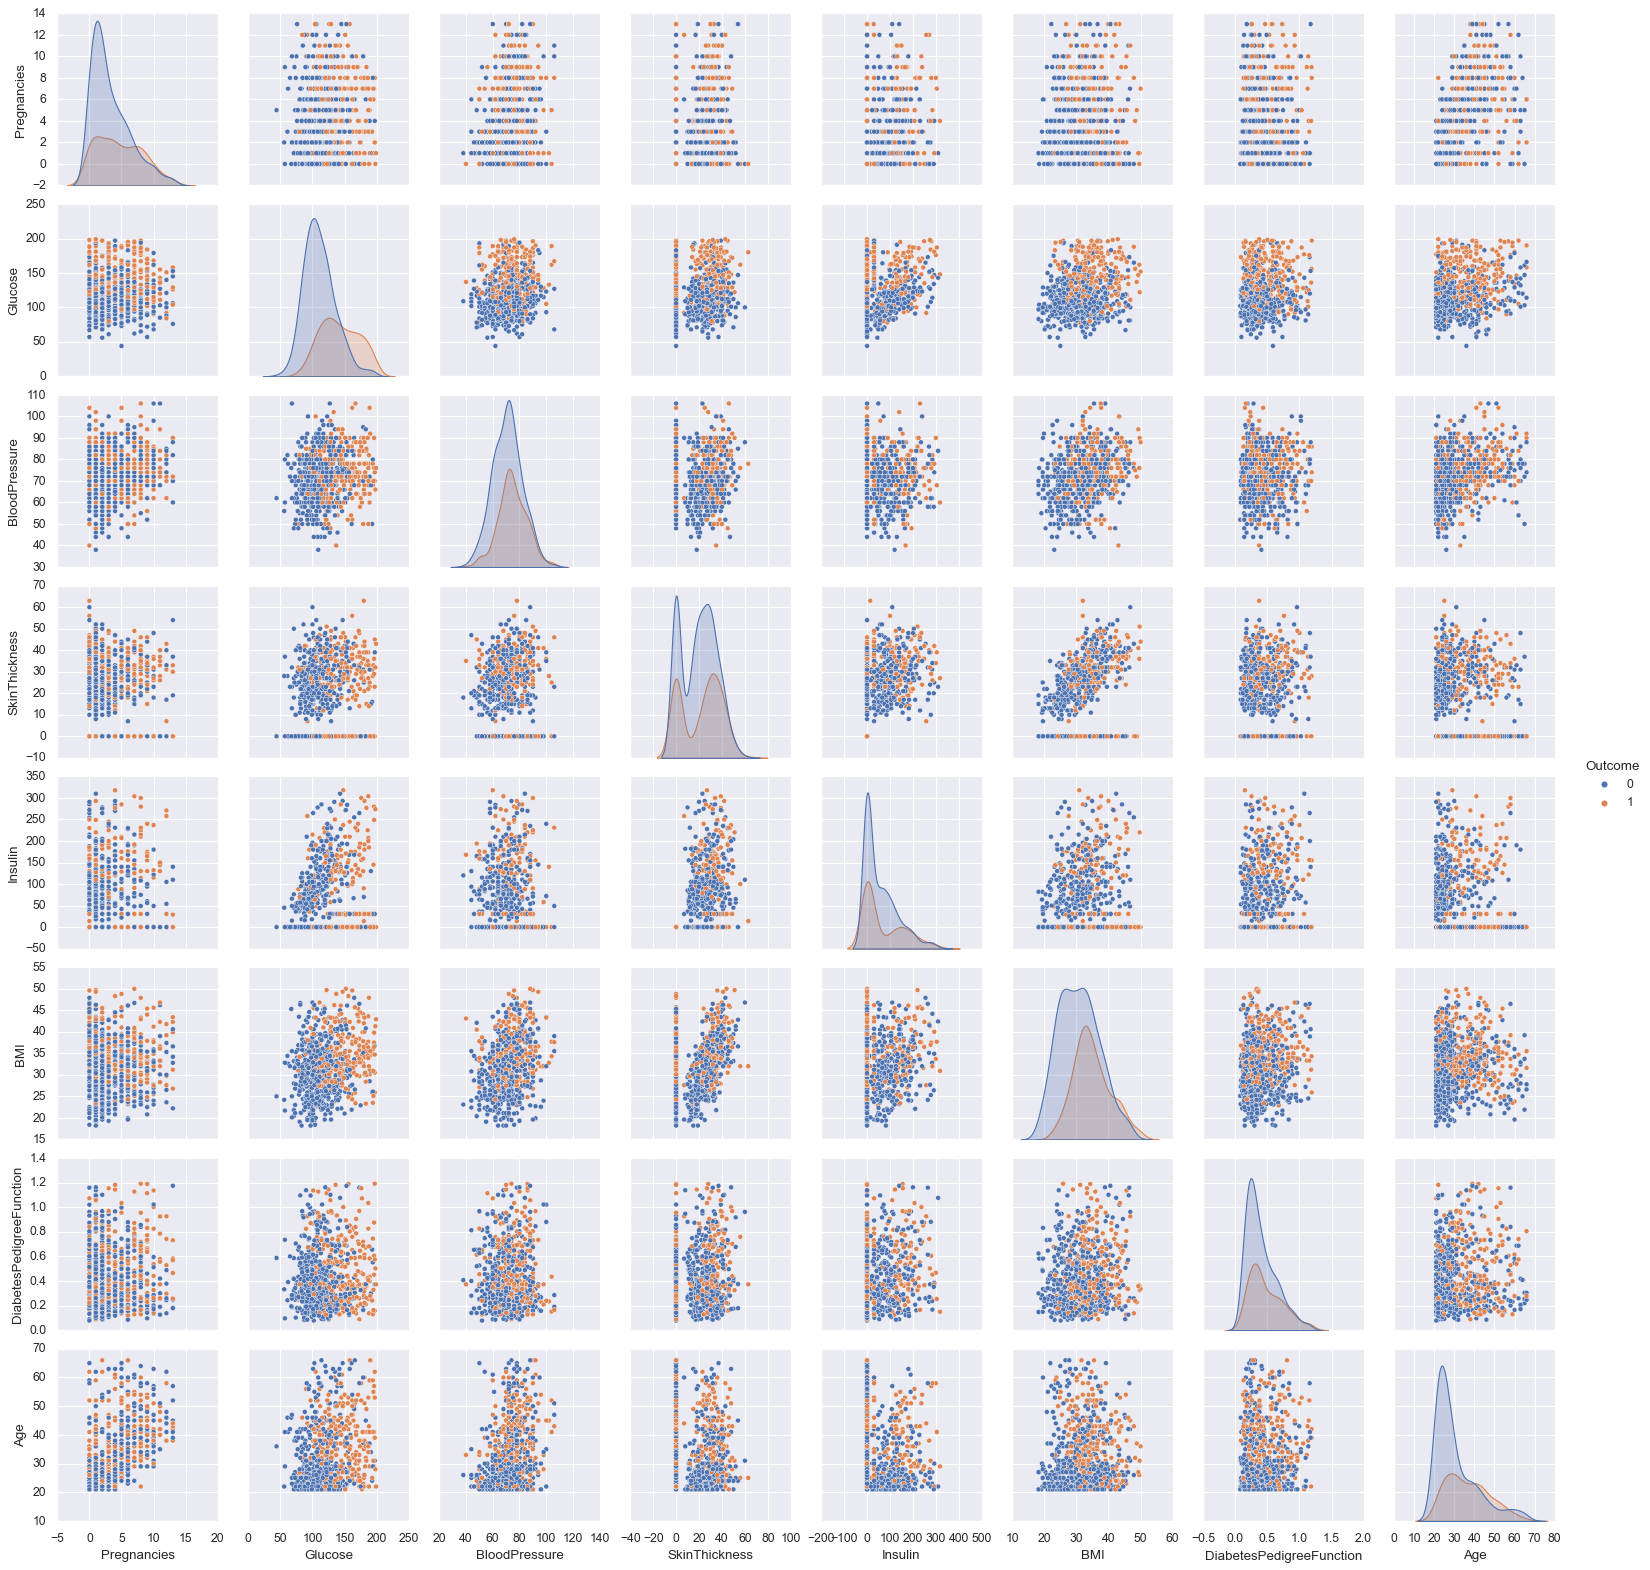

In [25]:
sns.pairplot(data=dataset,hue='Outcome',diag_kind='kde')
plt.show()

In [26]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [28]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [30]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions x_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


In [31]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [47]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=0)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[94 13]
 [21 26]]
Accuracy Score:  0.7792207792207793

K-Fold Validation Mean Accuracy: 76.54 %

Standard Deviation: 4.87 %

ROC AUC Score: 0.72

Precision: 0.67

Recall: 0.55

F1: 0.60
-----------------------------------

SVM :
[[97 10]
 [19 28]]
Accuracy Score:  0.8116883116883117

K-Fold Validation Mean Accuracy: 74.60 %

Standard Deviation: 5.57 %

ROC AUC Score: 0.75

Precision: 0.74

Recall: 0.60

F1: 0.66
-----------------------------------

KNeighbors :
[[89 18]
 [21 26]]
Accuracy Score:  0.7467532467532467

K-Fold Validation Mean Accuracy: 72.97 %

Standard Deviation: 4.27 %

ROC AUC Score: 0.69

Precision: 0.59

Recall: 0.55

F1: 0.57
-----------------------------------

GaussianNB :
[[88 19]
 [18 29]]
Accuracy Score:  0.7597402597402597

K-Fold Validation Mean Accuracy: 74.92 %

Standard Deviation: 5.44 %

ROC AUC Score: 0.72

Precision: 0.60

Recall: 0.62

F1: 0.61
-----------------------------------

BernoulliNB :
[[88 19]
 [23 24]]
Accuracy Score:  

In [48]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [49]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [50]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,Random Forest,82.467532,74.592808,6.490523,0.784351,0.727273,0.680851,0.703297
1,SVM,81.168831,74.600740,5.567546,0.751143,0.736842,0.595745,0.658824
10,XGBoost,81.168831,72.810682,5.855099,0.798867,0.666667,0.765957,0.712871
7,Extra Tree,79.870130,75.095188,5.399328,0.747763,0.690476,0.617021,0.651685
9,Gradiesnt Boost,78.571429,75.087255,7.172443,0.744383,0.652174,0.638298,0.645161
0,Logistic Regreesion,77.922078,76.541512,4.874479,0.715848,0.666667,0.553191,0.604651
3,GaussianNB,75.974026,74.918033,5.437440,0.719726,0.604167,0.617021,0.610526
8,AdaBoost,74.675325,73.289265,4.644792,0.716345,0.576923,0.638298,0.606061
2,KNeighbors,74.675325,72.969328,4.265670,0.692484,0.590909,0.553191,0.571429
4,BernoulliNB,72.727273,72.305658,4.447508,0.666534,0.558140,0.510638,0.533333


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (ExtraTreesClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [53]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 76.54%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 73.79%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 8}

----------------

SVC():
Best Accuracy : 76.54%
Best Parameters :  {'C': 0.5, 'kernel': 'linear', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 74.92%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 72.31%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 69.53%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 75.10%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

ExtraTreesClassifier():
Best Accuracy : 75.10%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------

AdaBoostClassifier():
Bes

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

ROC AUC score: 0.8576257705309207
Accuracy Score:  0.7792207792207793


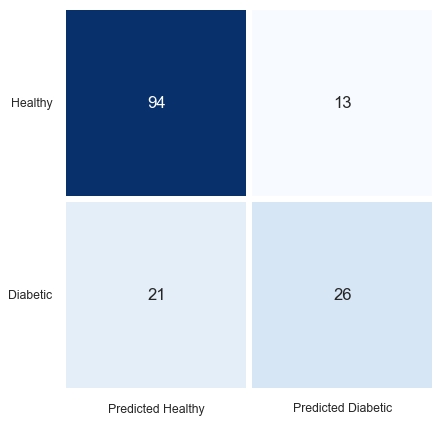

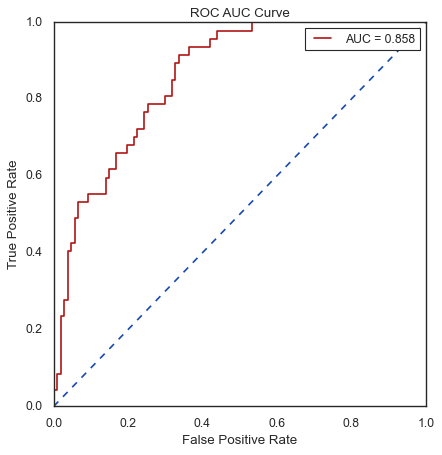

<Figure size 480x480 with 0 Axes>

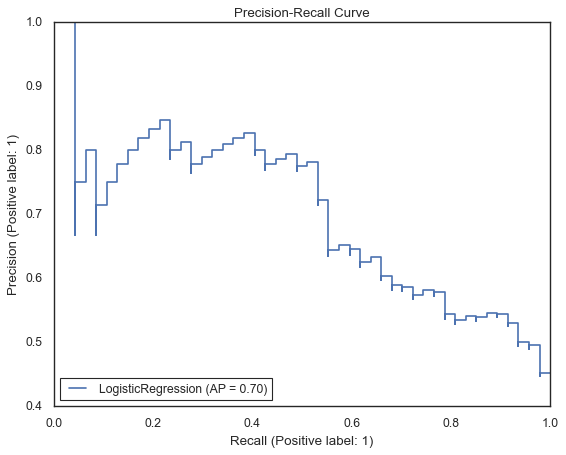

In [54]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(C= 1, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154

ROC AUC score: 0.8075164048518593
Accuracy Score:  0.7662337662337663


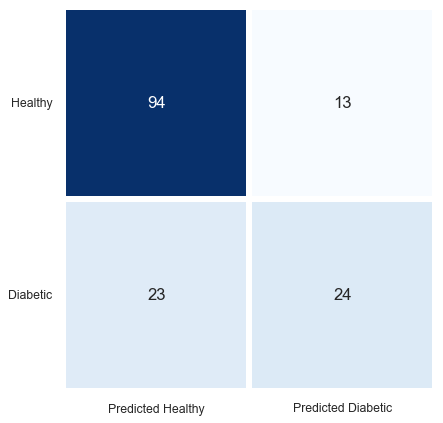

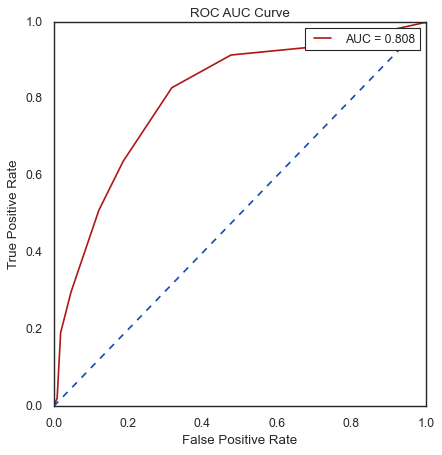

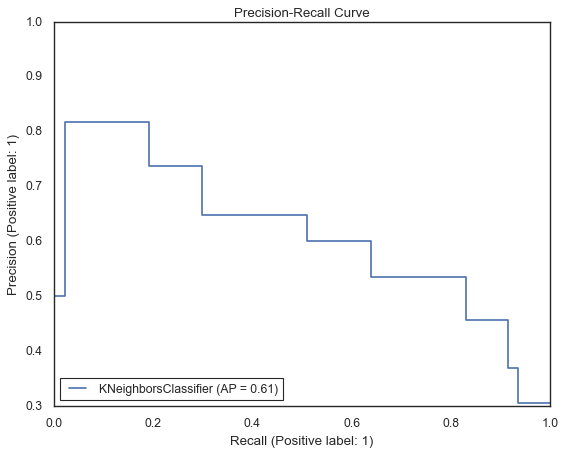

In [55]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

ROC AUC score: 0.8620003976933784
Accuracy Score:  0.7987012987012987


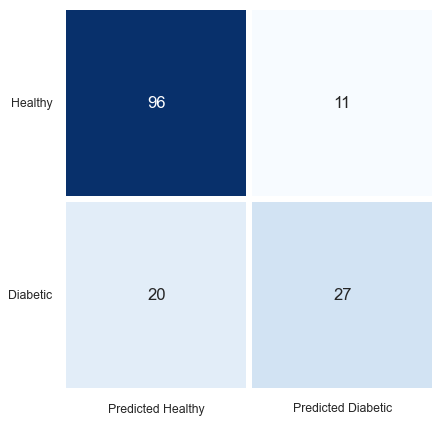

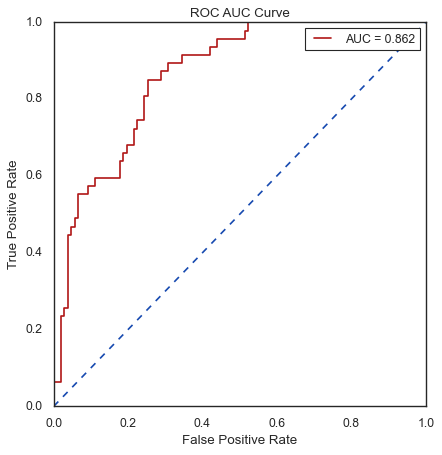

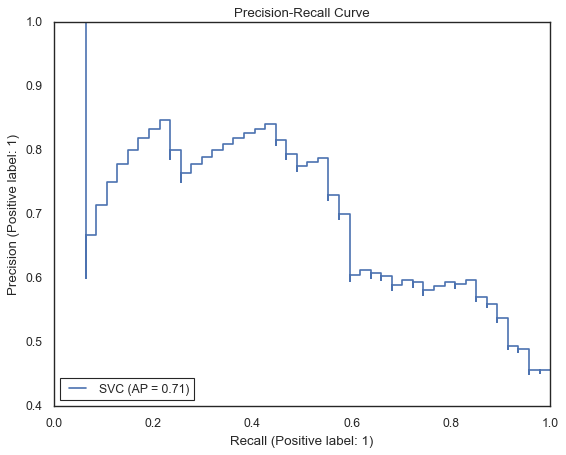

In [57]:
#Fitting SVC Model
classifier = SVC(C= 0.5, kernel= 'linear', random_state= 0, probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.60      0.62      0.61        47

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154

ROC AUC score: 0.8482799761383975
Accuracy Score:  0.7597402597402597


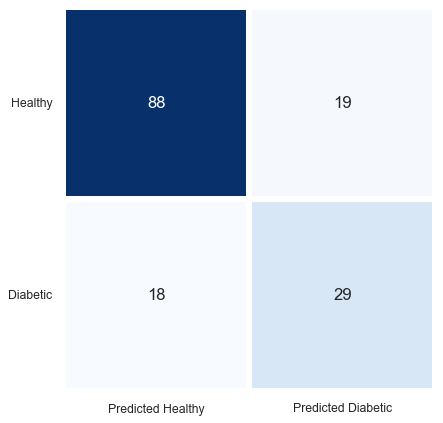

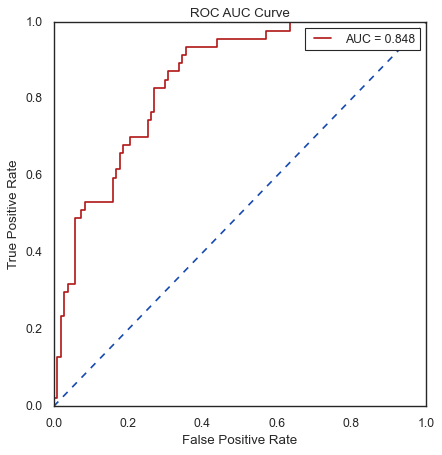

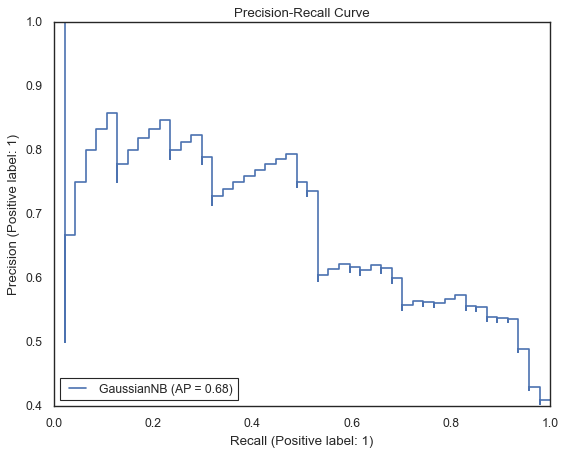

In [58]:
#Fitting GaussianNB Model
classifier = GaussianNB(var_smoothing= 1e-09)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       107
           1       0.56      0.51      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.72       154

ROC AUC score: 0.7850467289719626
Accuracy Score:  0.7272727272727273


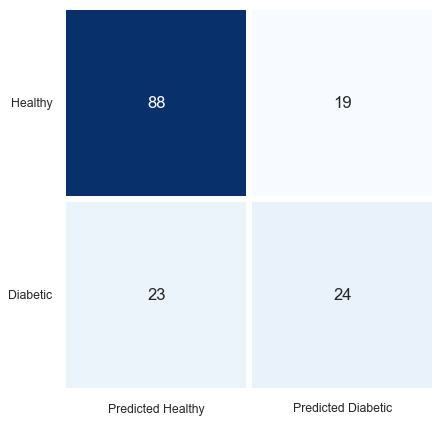

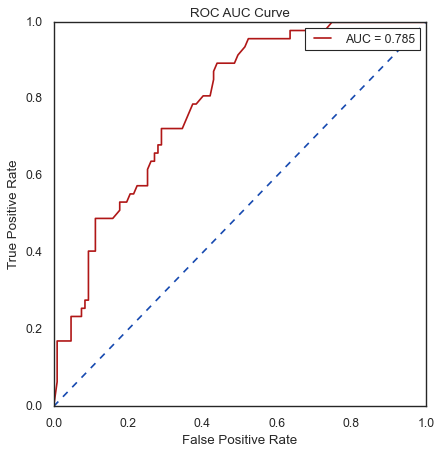

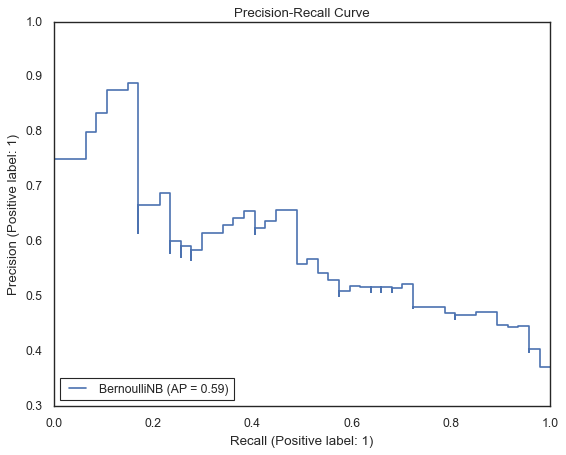

In [59]:
#Fitting BernoulliNB Model
classifier = BernoulliNB(alpha= 0.25)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       107
           1       0.52      0.60      0.55        47

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.72      0.71      0.71       154

ROC AUC score: 0.6763770133227281
Accuracy Score:  0.7077922077922078


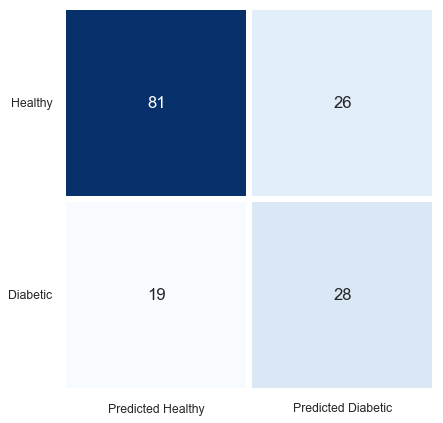

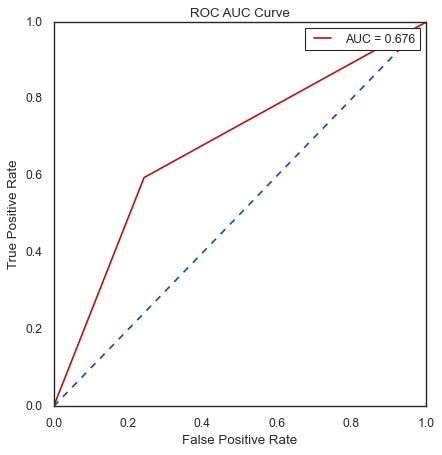

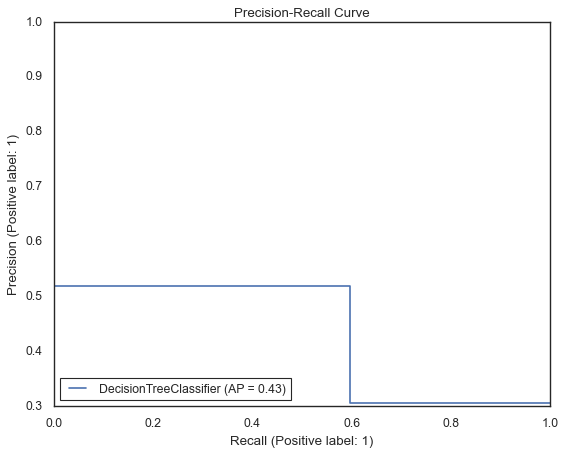

In [60]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'gini', random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

ROC AUC score: 0.8640882879300059
Accuracy Score:  0.8116883116883117


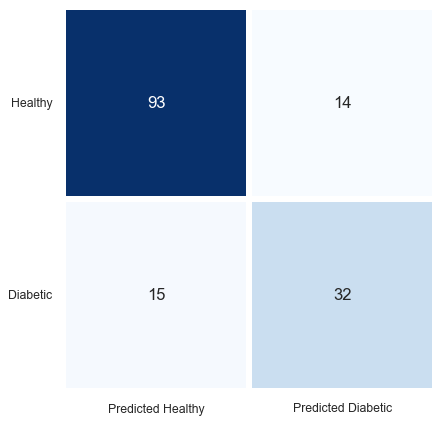

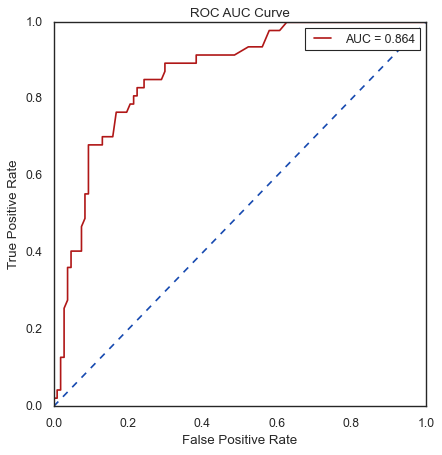

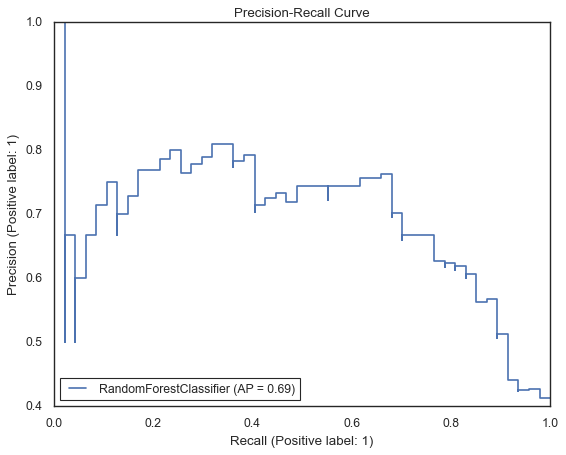

In [61]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154

ROC AUC score: 0.8563332670511037
Accuracy Score:  0.7987012987012987


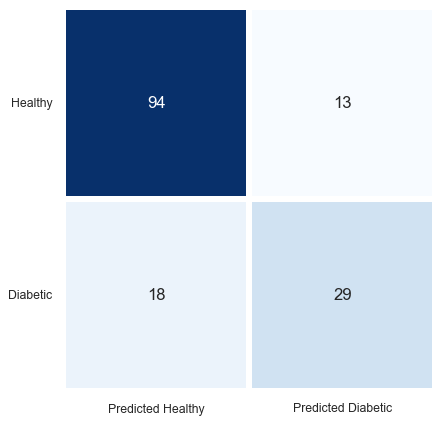

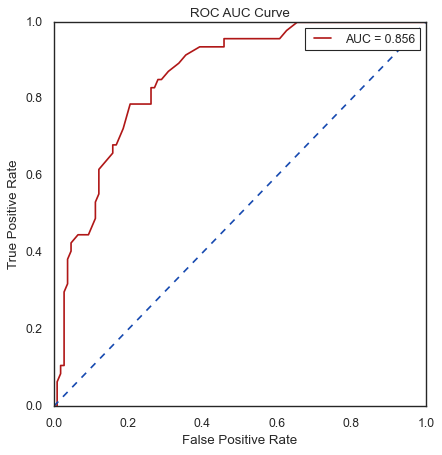

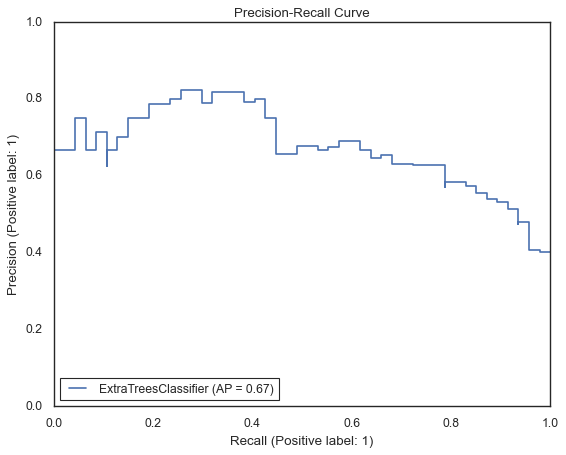

In [62]:
#Fitting ExtraTreesClassifier Model
classifier = ExtraTreesClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.61      0.47      0.53        47

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.73      0.75      0.74       154

ROC AUC score: 0.8372439848876516
Accuracy Score:  0.7467532467532467


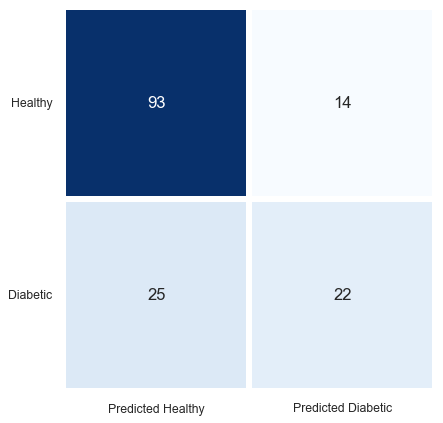

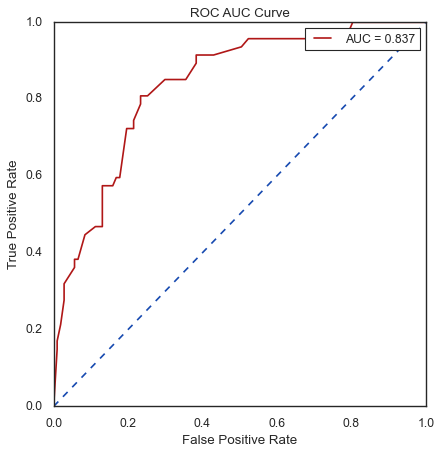

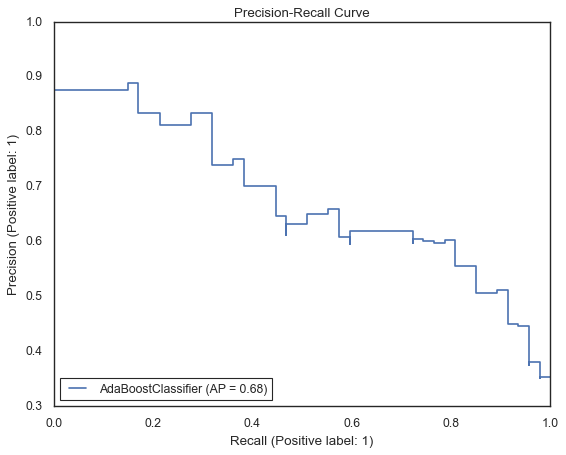

In [63]:
#Fitting AdaBoostClassifier Model
classifier = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154

ROC AUC score: 0.8283953072181348
Accuracy Score:  0.7987012987012987


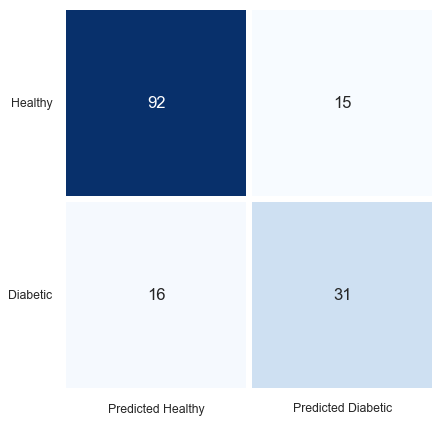

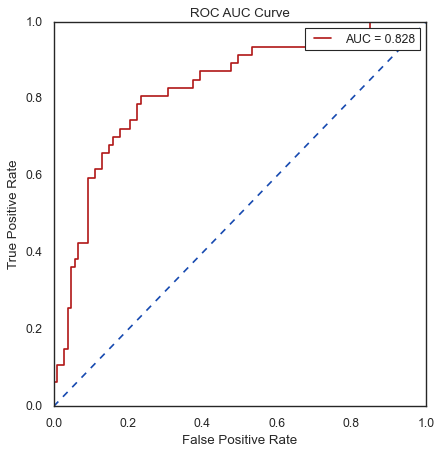

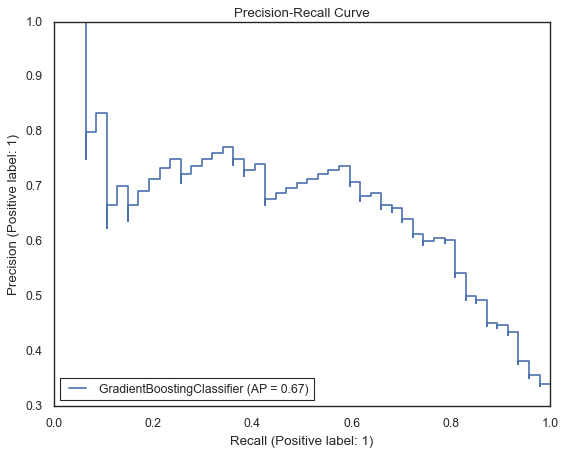

In [64]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       107
           1       0.68      0.77      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.82       154

ROC AUC score: 0.8385364883674686
Accuracy Score:  0.8181818181818182


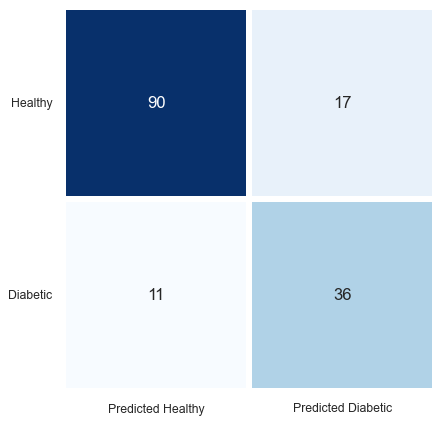

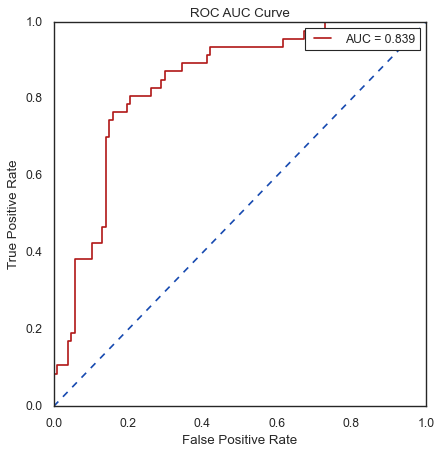

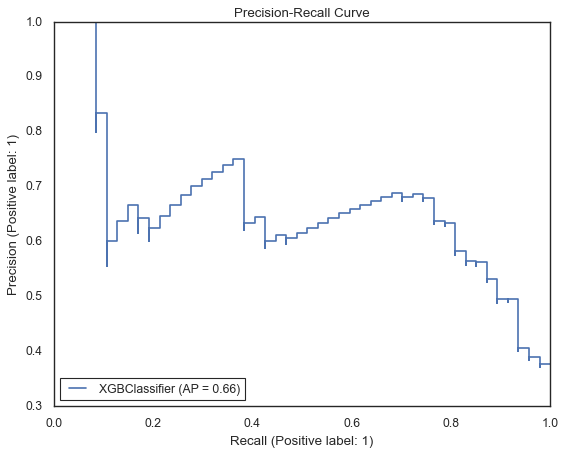

In [65]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#After extensive data analysis and I tried different classification models to see 
#how it performs on the dataset. I got pretty good results with accuracy, roc, precision and recall score. 
# But, I didn't stop there, after that I tuned the hyperparamters with the help of Grid 
#Search and saw the classification report with ROC AUC and Precision-Recall curve of different models. 

# With that, I came to conclusion that RandomForest, ExtraTrees and SVC are models which 
#are best fit for our dataset. 